# OpenCV 1 (Foundation)

## * Installation

In [1]:
! pip install opencv-python 
! pip install imutils

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
cv2.__version__

'4.5.4'

## * IO

### Getting the image

In [3]:
from matplotlib import pyplot as plt
def imshow(image = None, title = ""):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

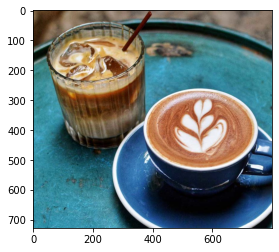

In [4]:
import imutils

url = 'https://post.healthline.com/wp-content/uploads/2020/08/coffee-worlds-biggest-source-of-antioxidants-1296x728-feature_0-800x728.jpg'
#url = 'https://res.cloudinary.com/practicaldev/image/fetch/s--BXoVOWNw--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.ibb.co/yyDtW47/own2d.png'
image = imutils.url_to_image(url)
imshow(image)

### About an Image

<img src='https://res.cloudinary.com/practicaldev/image/fetch/s--BXoVOWNw--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.ibb.co/yyDtW47/own2d.png' width = 800>

> Image Source : https://res.cloudinary.com/practicaldev/image/fetch/s--BXoVOWNw--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.ibb.co/yyDtW47/own2d.png

### Displaying an image

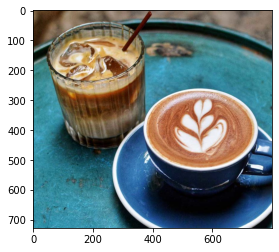

In [5]:
imbgr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(imbgr)

In [6]:
image.shape

(728, 800, 3)

### Saving an image

In [7]:
cv2.imwrite('coffee.jpg', image)

True

### Reading from a file

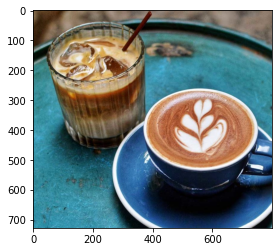

In [8]:
image = cv2.imread('coffee.jpg')
imshow(image)

## * Color spaces

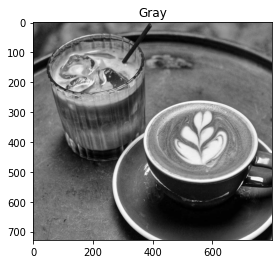

In [9]:
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(imgray, "Gray")

In [10]:
imgray.shape

(728, 800)

### Splitting Colors

In [11]:
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(728, 800)
(728, 800)
(728, 800)


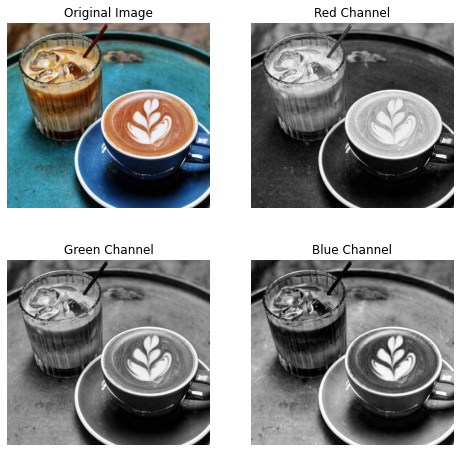

In [12]:
fig, axs = plt.subplots(2, 2)
# set fig size
fig.set_size_inches(8,8)
axs[0, 0].imshow(imbgr)
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(cv2.cvtColor(R, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Red Channel')
axs[1, 0].imshow(cv2.cvtColor(G, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Green Channel')
axs[1, 1].imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Blue Channel')

for ax in axs.flat:
    #ax.label_outer()
    ax.axis('off')

### The HSV Color Space

<img src = 'https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png' width = 800>

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

> Source : https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png

## * Drawing

### Canvas

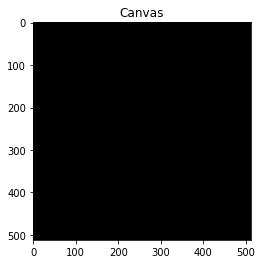

In [13]:
import numpy as np
canvas = np.zeros((512,512,3), np.uint8)
imshow(canvas,'Canvas')

### Drawing line
```cv2.line(image, starting cordinates, ending cordinates, color, thickness)```

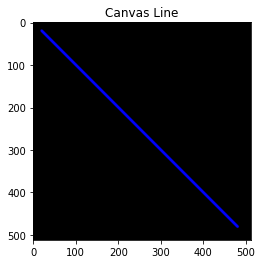

In [14]:
canvas_line = canvas.copy()
cv2.line(canvas_line, (20,20), (480,480), (255,0,0), 5)
imshow(canvas_line, 'Canvas Line')

### Drawing Rectangles
```cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)```

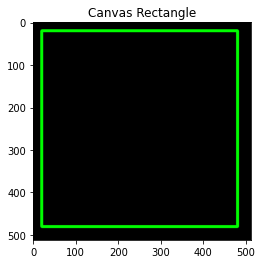

In [15]:
canvas_rect = canvas.copy()
cv2.rectangle(canvas_rect, (20,20), (480,480), (0,255,0), 5)
imshow(canvas_rect, 'Canvas Rectangle')

### Drawing Circles
```cv2.cirlce(image, center, radius, color, fill)```

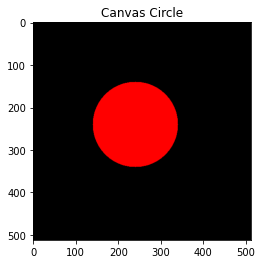

In [16]:
canvas_circle = canvas.copy()
cv2.circle(canvas_circle, (240,240), 100, (0,0,255), -1)
imshow(canvas_circle, 'Canvas Circle')

### Drawing Polygon
```cv2.polylines(image, points, Closed?, color, thickness)```

(4, 2)
(4, 1, 2)


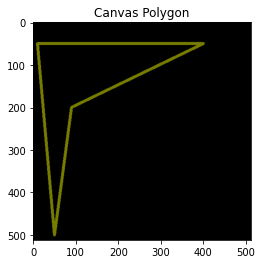

In [17]:
canvas_poly = canvas.copy()
pts = np.array([[10,50], [400,50], [90,200], [50,500]], np.int32)
print(pts.shape)
pts = pts.reshape((-1,1,2))
print(pts.shape)
cv2.polylines(canvas_poly, [pts], True, (0,125,120),5)
imshow(canvas_poly, 'Canvas Polygon')   # True = closed

### Writing on image
```cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)```

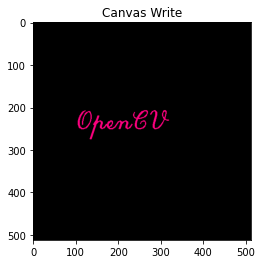

In [18]:
canvas_write = canvas.copy()
cv2.putText(canvas_write, 'OpenCV', (100,250), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 2, (128,0,255), 2)
imshow(canvas_write, 'Canvas Write')

## * Transformations

### Translation
```cv2.warpAffine(image, T, (width, height))```

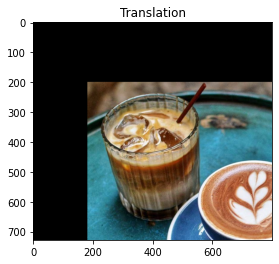

In [19]:
height, width = image.shape[:2]
h,w = height/4, width/4

# Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

T = np.float32([[1, 0, h], [0, 1,w]])
img_translation = cv2.warpAffine(image, T, (width, height))
imshow(img_translation, 'Translation')

### Rotation

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

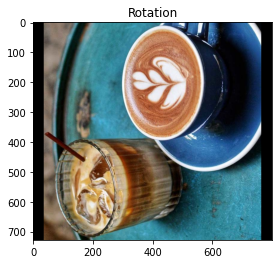

In [20]:
# Rotation Matrix
#       | cos -sin |
#  M  = | sin  cos |

rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow(rotated_image, 'Rotation')


### Transpose

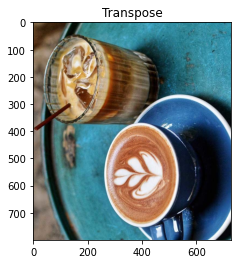

In [21]:
imtrans = cv2.transpose(image)
imshow(imtrans, 'Transpose')

### Flip

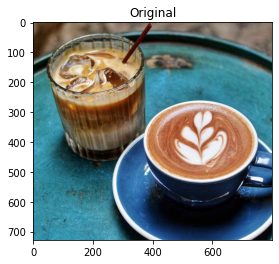

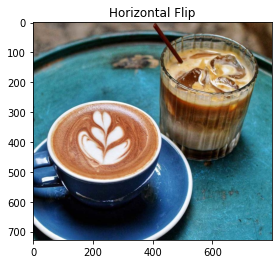

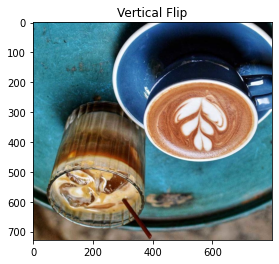

In [22]:

imshow(image, 'Original')
imshow(cv2.flip(image, 1), 'Horizontal Flip')
imshow(cv2.flip(image, 0), 'Vertical Flip')

### Scaling

In [23]:
image_quarter = cv2.resize(image, None, fx=0.25, fy=0.25)
image_double = cv2.resize(image, None, fx=2, fy=2)
image_resized = cv2.resize(image, (100,100))

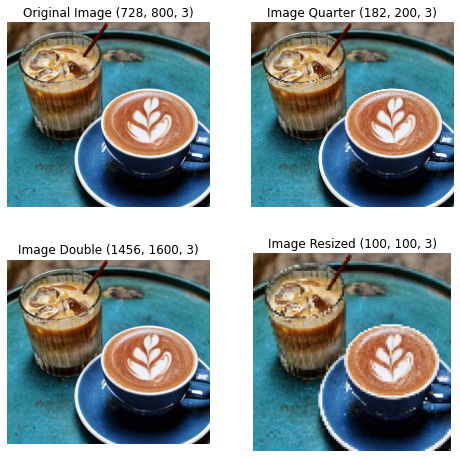

In [24]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(8,8)
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title(f'Original Image {image.shape}')
axs[0, 1].imshow(cv2.cvtColor(image_quarter, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title(f'Image Quarter {image_quarter.shape}')
axs[1, 0].imshow(cv2.cvtColor(image_double, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title(f'Image Double {image_double.shape}')
axs[1, 1].imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title(f'Image Resized {image_resized.shape}')

for ax in axs.flat:
    ax.label_outer()
    ax.axis('off')

### Image Pyramids
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Image_pyramid.svg/800px-Image_pyramid.svg.png' width = 800>

> Image Source : By Cmglee - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=42549151

In [25]:
imlarger = cv2.pyrUp(image)
imsmaller = cv2.pyrDown(image)
imtiny = cv2.pyrDown(imsmaller)

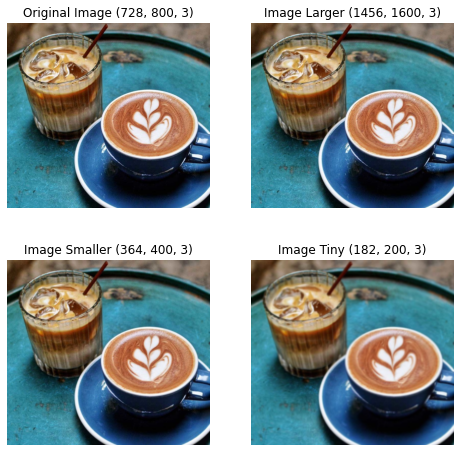

In [26]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(8,8)
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title(f'Original Image {image.shape}')
axs[0, 1].imshow(cv2.cvtColor(imlarger, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title(f'Image Larger {imlarger.shape}')
axs[1, 0].imshow(cv2.cvtColor(imsmaller, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title(f'Image Smaller {imsmaller.shape}')
axs[1, 1].imshow(cv2.cvtColor(imtiny, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title(f'Image Tiny {imtiny.shape}')

for ax in axs.flat:
    ax.label_outer()
    ax.axis('off')

### Cropping

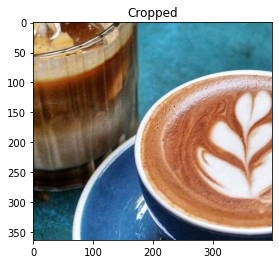

In [27]:
cropped = image[int(height*0.25):int(height*0.75), int(width*0.25):int(width*0.75),:]
imshow(cropped, 'Cropped')

## * Operations

### Arithmatic Operations

In [28]:
M = np.ones(image.shape, dtype = "uint8") * 100

imbright = cv2.add(image, M)

imdark = cv2.subtract(image, M)

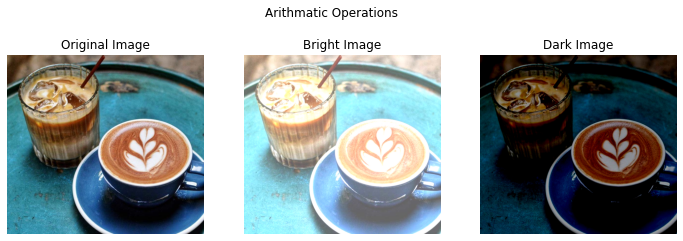

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(12,4)
fig.suptitle('Arithmatic Operations')
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax2.imshow(cv2.cvtColor(imbright, cv2.COLOR_BGR2RGB))
ax2.set_title('Bright Image')
ax3.imshow(cv2.cvtColor(imdark, cv2.COLOR_BGR2RGB))
ax3.set_title('Dark Image')

for ax in (ax1, ax2, ax3):
    #ax.label_outer()
    ax.axis('off')

### Bitwise Operations (Masking)

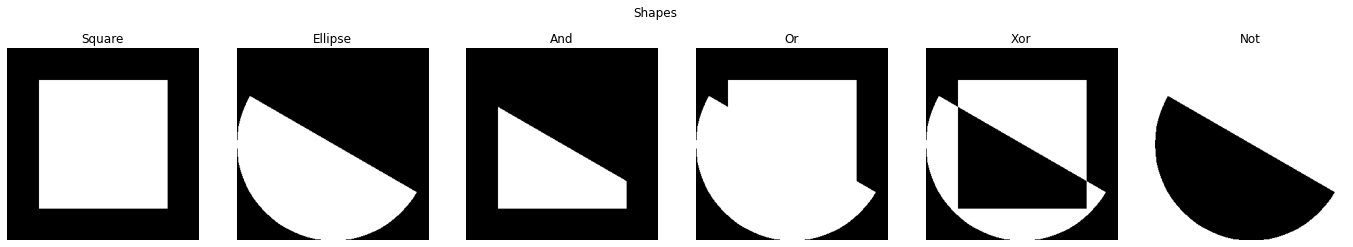

In [30]:
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)
#imshow(square, 'Square')

ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
#imshow(ellipse, 'Ellipse')

And = cv2.bitwise_and(square, ellipse)

Or = cv2.bitwise_or(square, ellipse)

Xor = cv2.bitwise_xor(square, ellipse)

Not = cv2.bitwise_not(ellipse)

fig, (ax1,ax2, ax3,ax4,ax5,ax6) = plt.subplots(1, 6)
fig.set_size_inches(4*6,4)
fig.suptitle('Shapes')
ax1.imshow(cv2.cvtColor(square, cv2.COLOR_BGR2RGB))
ax1.set_title('Square')
ax2.imshow(cv2.cvtColor(ellipse, cv2.COLOR_BGR2RGB))
ax2.set_title('Ellipse')

for ax in (ax1, ax2):
    ax.axis('off')
ax3.imshow(cv2.cvtColor(And, cv2.COLOR_BGR2RGB))
ax3.set_title('And')
ax4.imshow(cv2.cvtColor(Or, cv2.COLOR_BGR2RGB))
ax4.set_title('Or')
ax5.imshow(cv2.cvtColor(Xor, cv2.COLOR_BGR2RGB))
ax5.set_title('Xor')
ax6.imshow(cv2.cvtColor(Not, cv2.COLOR_BGR2RGB))
ax6.set_title('Not')


for ax in (ax1, ax2,ax3, ax4, ax5, ax6):
    ax.axis('off')

## * Convolution

### Blurring

In [31]:
kernel = np.ones((9,9), np.float32) / 81
blurr_ker = cv2.filter2D(image, -1, kernel)

blurr_avg = cv2.blur(image, (9,9))

blurr_gaus = cv2.GaussianBlur(image, (9,9), 0)

blur_med = cv2.medianBlur(image, 9)

blurr_bilateral = cv2.bilateralFilter(image, 9, 75, 75)

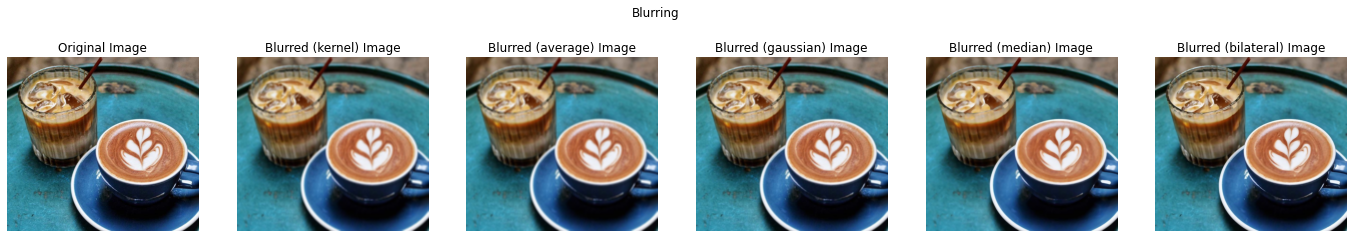

In [32]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)
fig.set_size_inches(4*6,4)
fig.suptitle('Blurring')
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax2.imshow(cv2.cvtColor(blurr_ker, cv2.COLOR_BGR2RGB))
ax2.set_title('Blurred (kernel) Image')
ax3.imshow(cv2.cvtColor(blurr_avg, cv2.COLOR_BGR2RGB))
ax3.set_title('Blurred (average) Image')
ax4.imshow(cv2.cvtColor(blurr_gaus, cv2.COLOR_BGR2RGB))
ax4.set_title('Blurred (gaussian) Image')
ax5.imshow(cv2.cvtColor(blur_med, cv2.COLOR_BGR2RGB))
ax5.set_title('Blurred (median) Image')
ax6.imshow(cv2.cvtColor(blurr_bilateral, cv2.COLOR_BGR2RGB))
ax6.set_title('Blurred (bilateral) Image')

for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    ax.axis('off')


### Sharpening

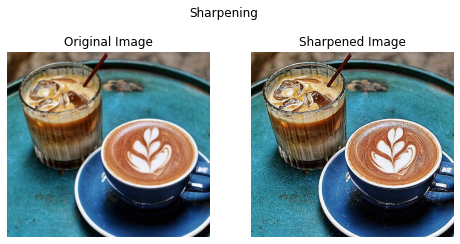

In [33]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

sharpened = cv2.filter2D(image, -1, kernel_sharpening)

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8,4)
fig.suptitle('Sharpening')
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax2.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
ax2.set_title('Sharpened Image')

for ax in (ax1, ax2):
    ax.axis('off')

## * Further Knowledge
- **All about OpenCV** (https://opencv.org/)   
- **Useful image manipulation tools** (https://github.com/PyImageSearch/imutils)  

> **CopyRight Info:**
All images used in this notebook, are copyright protected to their respective owner(s) / website(s). They are used for knowledge sharing purpose only.